There are two types of people in the world, aisle seaters and window seaters. I am an aisle seater, nothing is worse than limited bathroom access on a long flight. The first thing I do when I get my ticket is check to see if I have a window seat. If not, I immediately head over to the airline counter and try to get one.

Last flight, on Turkish Airlines, I ran into a curious situation. I recieved my boarding pass with my seat number, 18C, but the ticket did not specify if C was an aisle seat or not. Making matters worse, the airline counter was swamped with a few dozen people. So I asked myself: **given only the seat letter, C, what is the probability that it is an aisle seat?**

Later, on the flight, I decided to find out.

## Preliminaries

In [1]:
# Import required modules
import pandas as pd
import numpy as np

# Set plots to display in the iPython notebook
%matplotlib inline

## Setup possible seat configurations

I am a pretty frequently flyer on a variety of airlines and aircraft. There are a variety of seating configurations out there, but typically they follow some basic rules:

- No window cluster of seats has more than three seats.
- On small flights with three seats, the single seat is on the left side.
- No flight has more than nine rows.

Based on these rules, here are the "typical" seating configurations from aircraft with between two and nine seats per row. A '1' codifies that a seat is an aisle seat, a '0' codifies that it is a non-aisle seat (i.e. window or middle), and 'np.nan' denotes that the aircraft has less than nine seats (this is so all the list lengths are the same). 

In [2]:
# An aircraft with two seats per row
rows2 = [1,1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]

# An aircraft with three seats per row
rows3 = [1,1,0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,]

# An aircraft with four seats per row
rows4 = [0,1,1,0, np.nan, np.nan, np.nan, np.nan, np.nan]

# An aircraft with five seats per row
rows5 = [0,1,1,0,0, np.nan, np.nan,np.nan, np.nan]

# An aircraft with six seats per row
rows6 = [0,1,1,1,1,0, np.nan, np.nan, np.nan]

# An aircraft with seven seats per row
rows7 = [0,1,1,0,1,1,0, np.nan, np.nan]

# An aircraft with eight seats per row
rows8 = [0,0,1,1,1,1,0,0, np.nan]

# An aircraft with nine seats per row
rows9 = [0,0,1,1,0,1,1,0,0]

For example, in an aircraft with five seats per row, `rows5`, the seating arrangement would be:

1. window
2. aisle
3. aisle
4. middle
5. window
6. no seat
7. no seat
8. no seat
9. no seat

Next, I'm take advantage of pandas row summation options, but to do this I need to wrangle the data into a pandas dataframe. Essentially I am using the pandas dataframe as a matrix.

In [3]:
# Create a list variable of all possible aircraft configurations
seating_map = [rows2, rows3, rows4, rows5, rows6, rows7, rows8, rows9]

In [4]:
# Create a dataframe from the seating_map variable
df = pd.DataFrame(seating_map, 
                  columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
                  index=['rows2', 'rows3', 'rows4', 'rows5', 'rows6', 'rows7', 'rows8', 'rows9'])

Here is all the data we need to construct our probabilities. The columns represent individual seat letters (A, B, etc.) while the rows represent the number of seats-per-row in the aircraft.

In [5]:
# View the dataframe
df

,A,B,C,D,E,F,G,H,I
rows2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rows3,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
rows4,0,1,1.0,0.0,NaN,NaN,NaN,NaN,NaN
rows5,0,1,1.0,0.0,0.0,NaN,NaN,NaN,NaN
rows6,0,1,1.0,1.0,1.0,0.0,NaN,NaN,NaN
rows7,0,1,1.0,0.0,1.0,1.0,0.0,NaN,NaN
rows8,0,0,1.0,1.0,1.0,1.0,0.0,0.0,NaN
rows9,0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0


## Calculate aisle probability

Because each aircraft seats-per-row configuration (i.e. row) is binary (1 if aisle, 0 if non-aisle), the probability that a seat is an aisle is simply the mean value of each seat letter (i.e. column).

In [6]:
# Create a list wherein each element is the mean value of a column
aisle_probability = [df['A'].mean(), 
                     df['B'].mean(),
                     df['C'].mean(),
                     df['D'].mean(),
                     df['E'].mean(),
                     df['F'].mean(),
                     df['G'].mean(),
                     df['H'].mean(),
                     df['I'].mean()]

In [7]:
# Display the variable
aisle_probability

[0.25, 0.75, 0.8571428571428571, 0.5, 0.6, 0.75, 0.3333333333333333, 0.0, 0.0]

So there you have it, the probability that each seat letter is an aisle. However, we can make the presentation a little more intituative.

## Visualize seat letter probabilities

The most obvious visualization to convey the probabilities would be seat letters on the x-axis and probabilities on the y-axis. Panda's plot function makes that easy.

In [8]:
# Create a list of strings to use as the x-axis labels
seats = ['Seat A', 'Seat B', 'Seat C', 'Seat D', 
         'Seat E', 'Seat F', 'Seat G', 'Seat H', 'Seat I']

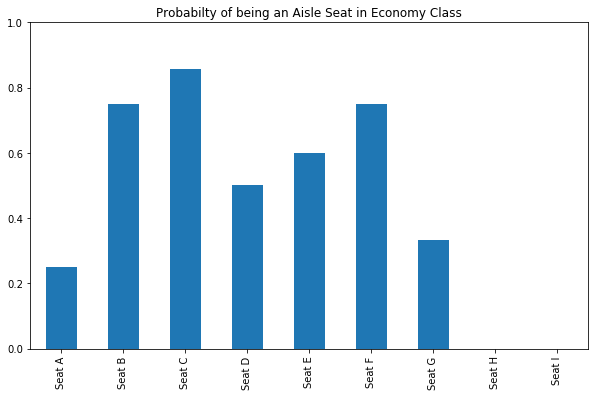

In [9]:
# Plot the probabilities, using 'seats' as the index as a bar chart
pd.Series(aisle_probability, index=seats).plot(kind='bar', # set y to range between 0 and 1
                                                    ylim=[0,1],
                                                    # set the figure size
                                                    figsize=[10,6],
                                                    # set the figure title
                                                    title='Probabilty of being an Aisle Seat in Economy Class')

So there we have it! If given a boarding pass with seat C you have a 86% probability of being in an aisle seat!

I hope this was helpful!